<a href="https://colab.research.google.com/github/csnsnigdha18/LSTM-Neural-Network/blob/main/Copy_of_Stacked_7_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D

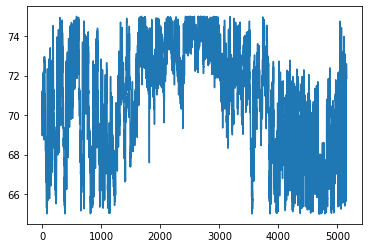

In [ ]:
dataframe = read_csv('/content/drive/MyDrive/LSTM/good_ambient_temperature_system_failure.csv', usecols=[0])
plt.plot(dataframe)


In [ ]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

# Normalization is optional but recommended for neural network as certain
# activation functions are sensitive to magnitude of numbers.
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
gtest_size = len(dataset) - train_size
train, gtest = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
seq_size = length =  10
batch_size = 1
train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train)) # 95
print("Total number of samples in the generated data = ", len(train_generator)) # 55

Total number of samples in the original training data =  3402
Total number of samples in the generated data =  3392


In [ ]:
x, y = train_generator[0]
validation_generator = TimeseriesGenerator(gtest, gtest, length=length ,batch_size=batch_size)


In [ ]:
num_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(length, num_features)))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)
trainPredict = model.predict(train_generator)
gtestPredict = model.predict(validation_generator)

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform(train)
gtestPredict = scaler.inverse_transform(gtestPredict)
gtestY_inverse = scaler.inverse_transform(gtest)
trainScore = math.sqrt(mean_squared_error(trainY_inverse[length:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

gtestScore = math.sqrt(mean_squared_error(gtestY_inverse[length:], gtestPredict[:,0]))
print('Test Score: %.2f RMSE' % (gtestScore))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


3392/3392 - 100s - loss: 0.0328 - val_loss: 0.0460 - 100s/epoch - 29ms/step
Epoch 2/100
3392/3392 - 84s - loss: 0.0107 - val_loss: 0.0130 - 84s/epoch - 25ms/step
Epoch 3/100
3392/3392 - 85s - loss: 0.0084 - val_loss: 0.0110 - 85s/epoch - 25ms/step
Epoch 4/100
3392/3392 - 83s - loss: 0.0080 - val_loss: 0.0091 - 83s/epoch - 25ms/step
Epoch 5/100
3392/3392 - 84s - loss: 0.0076 - val_loss: 0.0083 - 84s/epoch - 25ms/step
Epoch 6/100
3392/3392 - 83s - loss: 0.0078 - val_loss: 0.0109 - 83s/epoch - 24ms/step
Epoch 7/100
3392/3392 - 82s - loss: 0.0075 - val_loss: 0.0105 - 82s/epoch - 24ms/step
Epoch 8/100
3392/3392 - 84s - loss: 0.0074 - val_loss: 0.0102 - 84s/epoch - 25ms/step
Epoch 9/100
3392/3392 - 83s - loss: 0.0073 - val_loss: 0.0105 - 83s/epoch - 24ms/step
Epoch 10/100
3392/3392 - 82s - loss: 0.0073 - val_loss: 0.0089 - 82s/epoch - 24ms/step
Epoch 11/100
3392/3392 - 84s - loss: 0.0072 - val_loss: 0.0100 - 84s/epoch - 25ms/step
Epoch 12/100
3392/3392 - 84s - loss: 0.0072 - val_loss: 0.0090